In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [172]:
def descript(x):
    _x = x  # Для возможности предобработки данных (например, исключения нечисловых значений) 
    result = []
    result.append(len(x)) # Чисо элементов выборки
    result.append(np.mean(_x)) # среднее
    result.append((np.min(_x), np.max(_x))) # (min, max)
    result.append(np.std(_x)) # стандартное отклонение
    result.append(result[0]/result[-1]) # коэффициент вариации (Пирсона)
    result.append((np.percentile(_x, 25), np.percentile(_x, 50), np.percentile(_x, 75))) # квартили
    result.append(sts.mode(_x)) # мода
    result.append(sts.skew(_x))  # асимметрия 
    result.append(sts.kurtosis(_x))  # эксцесс
    _range = np.linspace(0.9 * np.min(_x), 1.1 * np.max(_x), 100) # область определения для оценки плотности
    result.append(sts.gaussian_kde(_x)(_range))  # оценка плотности распределения
    return tuple(result)

In [173]:
n = [1, 3, 5, 10, 50]
mu = 0.0
sigma = 1.0
# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)

data = list()


Параметр loc задаёт μ, scale — среднеквадратичное отклонение σ.

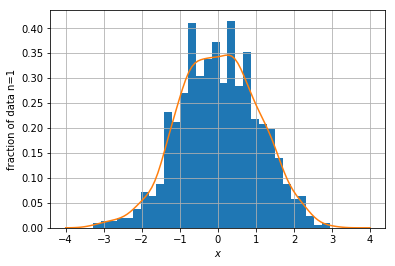

Число элементов выборки: 1000, n=1
Среднее значение: 0.0241
Минимальное и максимальное значения: (-3.2717, 2.9458)
Стандартное отклонение: 1.0377
Коэффициент вариации (Пирсона): 963.6537
Квартили: (25%) = -0.7155, (50%) = 0.0096, (75%) = 0.7514
Коэффициент асимметрии: -0.0718
Коэффициент эксцесса: -0.1685


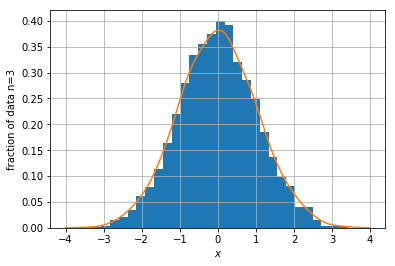

Число элементов выборки: 1000, n=3
Среднее значение: 0.0008
Минимальное и максимальное значения: (-3.5276, 3.4182)
Стандартное отклонение: 1.0224
Коэффициент вариации (Пирсона): 2934.3250
Квартили: (25%) = -0.6927, (50%) = -0.0010, (75%) = 0.6992
Коэффициент асимметрии: 0.0286
Коэффициент эксцесса: -0.0723


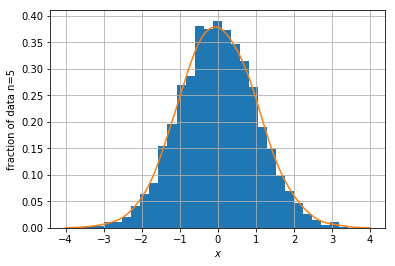

Число элементов выборки: 1000, n=5
Среднее значение: -0.0020
Минимальное и максимальное значения: (-3.7021, 3.4327)
Стандартное отклонение: 1.0102
Коэффициент вариации (Пирсона): 4949.5246
Квартили: (25%) = -0.6797, (50%) = -0.0194, (75%) = 0.6842
Коэффициент асимметрии: 0.0241
Коэффициент эксцесса: 0.0242


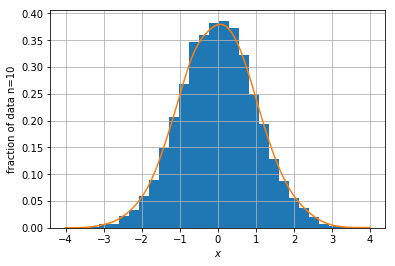

Число элементов выборки: 1000, n=10
Среднее значение: -0.0007
Минимальное и максимальное значения: (-3.9233, 3.9708)
Стандартное отклонение: 1.0011
Коэффициент вариации (Пирсона): 9988.6212
Квартили: (25%) = -0.6846, (50%) = 0.0020, (75%) = 0.6771
Коэффициент асимметрии: 0.0158
Коэффициент эксцесса: -0.0311


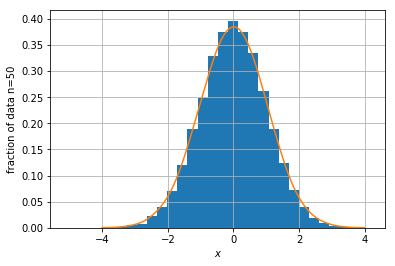

Число элементов выборки: 1000, n=50
Среднее значение: -0.0038
Минимальное и максимальное значения: (-5.1142, 4.1661)
Стандартное отклонение: 1.0073
Коэффициент вариации (Пирсона): 49637.3358
Квартили: (25%) = -0.6769, (50%) = 0.0017, (75%) = 0.6761
Коэффициент асимметрии: -0.0223
Коэффициент эксцесса: 0.0229


In [174]:
#x = np.linspace(-4,4,100)
for i in range(len(n)):
    # сгенерируем 1000 значений с глубиной n для i-той выборки
    data.append(norm_rv.rvs(size=1000*n[i]))
    
    # Вычисление важных показателей
    nn, m, minmax, s, cv, perct, mode, skew, kurt, kde = descript(data[i])
      
    density = sts.gaussian_kde(data[i])
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    
    # Вывод на экран гистограммы
    plt.hist(data[i], bins=30, normed=True)
    plt.ylabel('fraction of data n={}'.format(n[i]))
    plt.xlabel('$x$')
    plt.plot(x,density(x))
    plt.rcParams['axes.grid'] = True
    plt.show()
    
    
    print('Число элементов выборки: {}, n={}'.format(nn/n[i], n[i]))
    print('Среднее значение: {0:.4f}'.format(m))
    print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
    print('Стандартное отклонение: {0:.4f}'.format(s))
    print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
    print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
    print('Коэффициент асимметрии: {0:.4f}'.format(skew))
    print('Коэффициент эксцесса: {0:.4f}'.format(kurt))
